In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd



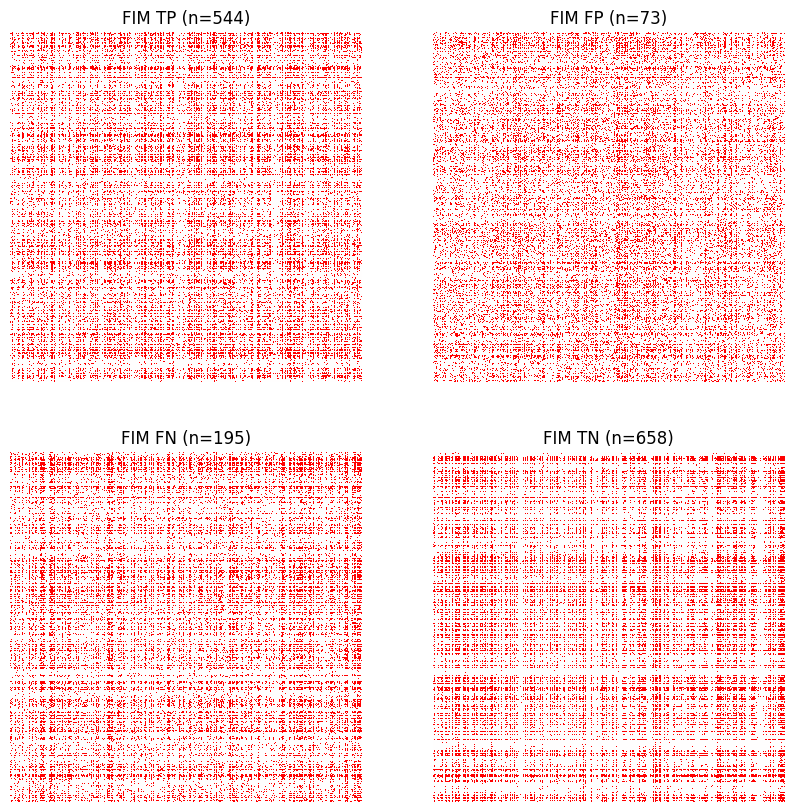

In [63]:
# load pickle
with open('fim.pkl', 'rb') as f:
    fim = pickle.load(f)

fim_data = {'TP': fim['TP'], 'FP': fim['FP'], 'FN': fim['FN'], 'TN': fim['TN']}
counts = {'TP': fim['TP_count'], 'FP': fim['FP_count'], 'FN': fim['FN_count'], 'TN': fim['TN_count']}

lim = 1e-2
cmap='bwr'


for key in fim_data.keys():
    # Calculate 20th and 80th percentiles
    lower = np.percentile(fim_data[key], 10)
    upper = np.percentile(fim_data[key], 90)

    # Create mask for values not in the top 20% and bottom 20%
    mask = (fim_data[key] > lower) & (fim_data[key] < upper)

    # Set these values to 0
    fim_data[key][mask] = 0
    fim_data[key][(~ mask)] = 1

fig, axs = plt.subplots(2, 2, figsize=(10, 10))


for ax, (key, data) in zip(axs.flat, fim_data.items()):
    sns.heatmap(data, annot=False, fmt='d', cmap=cmap, vmin=-lim, vmax=lim, ax=ax, cbar=False)
    ax.set_title(f'FIM {key} (n={counts[key]})')
    ax.set(xticks=[], yticks=[])

# plt.tight_layout()
plt.show()

In [89]:
with open('l_fim.pkl', 'rb') as f:
    l_fim = pickle.load(f)

l_fim_data = {'TP': l_fim['TP'], 'FP': l_fim['FP'], 'FN': l_fim['FN'], 'TN': l_fim['TN']}
len(l_fim['TP'])

X = np.concatenate([l_fim['TP'], l_fim['FP'], l_fim['FN'], l_fim['TN']], axis=0)
X_embedded = TSNE(n_components=2, metric='cosine', random_state=0).fit_transform(X)
df = pd.DataFrame(X_embedded, columns=['x', 'y'])
df['label'] = ['TP']*len(l_fim['TP']) + ['FP']*len(l_fim['FP']) + ['FN']*len(l_fim['FN']) + ['TN']*len(l_fim['TN'])


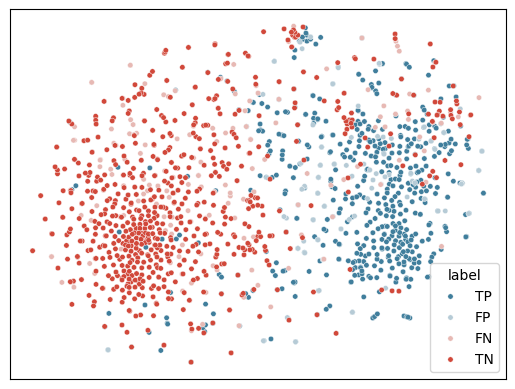

In [100]:
cmap = sns.diverging_palette(230, 15, n=4)

sns.scatterplot(data=df, x='x', y='y', hue='label', s=15, palette=cmap)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('cluster_fim_tight.pdf', bbox_inches='tight')
plt.show()